# Manipulação e Visualização de moléculas descritas por SMILES

Neste notebook, será abordado os seguintes tópicos:

- Introdução ao SMILES;
- Manipulação de strings SMILES com RDKit;
- Cálculo de Descritores Moleculares: Peso Molecular (MW), LogP, Doadores e Aceitadores de Hidrogênio (Regra dos 5 de Lipinski);
- Visualização: Renderização de estruturas químicas
- DataFrames do Pandas.

As ferramentas a serem utilizadas serão o Python, RDKit, PubChemPy e Pandas.

### Importando bibliotecas

In [1]:
# Instale as bibliotecas pubchempy e rdkit, caso elas não tenham sido instaladas
!pip install pubchempy rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 25.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors, Lipinski, Crippen
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole

## Bases de Dados Comuns

Para facilitar a manipulação e visualização de moléculas descritas por strings SMILES, diversas bases de dados públicas oferecem dados químicos extensos, incluindo SMILES. Abaixo está um resumo das bases de dados proeminentes:

*   **PubChem**
    *   **Propósito Primário**: Um repositório público para informações sobre substâncias químicas e suas atividades biológicas. Serve como um recurso central para informações químicas e biológicas.
    *   **Informações Químicas**: Contém uma vasta coleção de pequenas moléculas, substâncias e bioensaios. Os dados incluem estruturas químicas, identificadores, propriedades e atividades biológicas.
    *   **Acesso aos Dados**: Os dados podem ser acessados através de sua interface web para buscas individuais, e grandes conjuntos de dados podem ser baixados via FTP. Também oferece uma API para acesso programático, que é utilizado pela biblioteca `PubChemPy` para acessá-los.

*   **ChEMBL**
    *   **Propósito Primário**: Uma base de dados química de moléculas bioativas com propriedades semelhantes a medicamentos, curada manualmente. Foca na descoberta e otimização de leads.
    *   **Informações Químicas**: Contém informações sobre compostos, seus alvos e seus resultados de bioatividade, extraídos da literatura científica.
    * **Acesso a Dados**: Acessível por meio de uma interface web, acesso programático via sua API RESTful e downloads de dados em vários formatos (ex: SDF, CSV).

Dentre outras bases famosas, também se encontram: **ZINC (ZINCPharmer)** e o **DrugBank** que também provém acesso à diversas moleculas descritas em SMILES.

### Consultando uma molécula do PubChem

A biblioteca `pubchempy` nos ajudará à pesquisar moléculas na extensa base do PubChem. Cada molécula possui a sua respectiva representação em SMILES, sua CID (Compound ID) e outras propriedades, tais como peso e fórmula molecular, nome IUPAC, etc.

Na célula a seguir, vamos consultar a molécula da Cafeína e verificar a sua CID e representação SMILES. Também é possível consultar uma molécula por meio de outras propriedades, como a sua própria CID ou o seu nome IUPAC.

In [3]:
def get_molecule(compound_name):
  # Busca todos os compostos com este nome
  compounds = pcp.get_compounds(compound_name, 'name')

  if compounds:
      # Pega o primeiro resultado
      compound = compounds[0]
      print(f"Nome do composto: {compound.iupac_name}")
      print(f"CID: {compound.cid}")
      # Outras propriedades podem ser acessadas, tais como .molecular_weight,
      # .xlogp, etc.

      return compound
  else:
      print(f"Nenhum composto encontrado para '{compound_name}' em PubChem.")

In [4]:
# Buscando a molecula da cafeina
caffeine = get_molecule("Caffeine")

Nome do composto: 1,3,7-trimethylpurine-2,6-dione
CID: 2519


### SMILES

A representação SMILES (do inglês Simplified Molecular Input Line Entry System) é uma notação química que permite descrever a estrutura de uma molécula usando apenas uma linha de texto.

Em vez de precisar de um desenho complexo ou de um arquivo 3D, o SMILES utiliza letras (para os átomos) e símbolos (para ligações e formas) para que computadores possam processar estruturas químicas de forma rápida e eficiente.

As moléculas obtidas da PubChem possuem a representação SMILES que pode ser acessada do atributo `.smiles`

In [5]:
print(f"SMILES: {caffeine.smiles}")

SMILES: CN1C=NC2=C1C(=O)N(C(=O)N2C)C


### A biblioteca RDKit

A `RDKit` é uma biblioteca open-source amplamente utilizada em química computacional e quimioinformática, principalmente com a linguagem Python (mas também com C++). Ela permite representar, manipular, analisar e visualizar estruturas químicas de forma computacional.

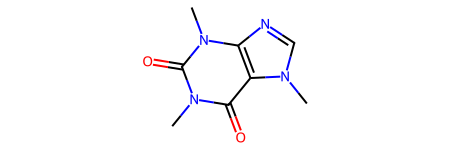

In [6]:
# Transformando a representação SMILES para a representação da RDKit
caffeine_mol = Chem.MolFromSmiles(caffeine.smiles)
display(caffeine_mol)

Com a RDKit, é possível criar moléculas a partir de representações textuais, como SMILES, converter entre diferentes formatos químicos e calcular descritores moleculares, que são propriedades numéricas usadas para caracterizar moléculas (massa molecular, polaridade, número de ligações, entre outras). Esses descritores são muito importantes em aplicações de aprendizado de máquina, como previsão de atividade biológica ou propriedades físico-químicas.

#### Descritores Moleculares



In [7]:
# Descritores Básicos
def get_basic_descriptors(mol):
  return {
      'peso_molecular': Descriptors.MolWt(mol),
      'formula_molecular': rdMolDescriptors.CalcMolFormula(mol),
      'num_atomos': mol.GetNumAtoms(),
      'num_atomos_pesados': Lipinski.HeavyAtomCount(mol),
      'num_ligacoes': mol.GetNumBonds()
    }

In [8]:
descriptors = get_basic_descriptors(caffeine_mol)

print(f"\nPeso Molecular: {descriptors["peso_molecular"]:.2f} g/mol")
print(f"Fórmula Molecular: {descriptors["formula_molecular"]}")
print(f"Número Total de Átomos: {descriptors["num_atomos"]}")
print(f"Número de Átomos Pesados (não-H): {descriptors["num_atomos_pesados"]}")
print(f"Número de Ligações: {descriptors["num_ligacoes"]}")


Peso Molecular: 194.19 g/mol
Fórmula Molecular: C8H10N4O2
Número Total de Átomos: 14
Número de Átomos Pesados (não-H): 14
Número de Ligações: 15


Por meio da `RDKit`, podemos criar funções para automatizar a análise de moléculas. Por exemplo, a função abaixo avalia se uma molécula atende à regra dos 5 de Lipinski, para prever se uma molécula tem potencial para ser um medicamento oralmente ativo.

In [9]:
def lipinski_rule(mol):
    """
    Avalia se uma molécula segue a Regra dos 5 de Lipinski (Drug-likeness).

    Parâmetros:
        mol: Molécula RDKit

    Retorna:
        dict: Dicionário com os resultados da análise contendo:
            - 'peso_molecular': float
            - 'logP': float
            - 'hbd': int (doadores de H)
            - 'hba': int (aceitadores de H)
            - 'rot_bonds': int (ligações rotacionáveis)
            - 'criterios_aprovados': int (0-5)
            - 'aprovado': bool (True se ≥4 critérios atendidos)
    """

    # Calcular descritores
    peso_molecular = Descriptors.MolWt(mol)
    logP = Crippen.MolLogP(mol)
    hbd = Lipinski.NumHDonors(mol)
    hba = Lipinski.NumHAcceptors(mol)
    rot_bonds = Lipinski.NumRotatableBonds(mol)

    # Avaliar critérios
    pm_ok = peso_molecular <= 500
    logP_ok = logP <= 5
    hbd_ok = hbd <= 5
    hba_ok = hba <= 10
    rot_ok = rot_bonds <= 10

    # Contabilizar aprovações
    criterios_aprovados = sum([pm_ok, logP_ok, hbd_ok, hba_ok, rot_ok])
    lipinski_ok = criterios_aprovados >= 4

    # Retornar resultados como dicionário
    return {
        'peso_molecular': peso_molecular,
        'logP': logP,
        'hbd': hbd,
        'hba': hba,
        'rot_bonds': rot_bonds,
        'pm_ok': pm_ok,
        'logP_ok': logP_ok,
        'hbd_ok': hbd_ok,
        'hba_ok': hba_ok,
        'rot_ok': rot_ok,
        'criterios_aprovados': criterios_aprovados,
        'aprovado': lipinski_ok
    }

In [10]:
# Verificando a regra de Lipinski na molécula de cafeína
results = lipinski_rule(caffeine_mol)

if results['aprovado']:
    print("A molécula atende à Regra dos 5 de Lipinski.")
else:
    print("A molécula não atende à Regra dos 5 de Lipinski.")

A molécula atende à Regra dos 5 de Lipinski.


#### Manipulando moléculas usando a RDKit

Nesta seção, utilizaremos o Etileno (Ethylene) para introduzir as funcionalidades de manipulação da `RDKit`. O objetivo é pegar uma molécula bem simples e transformá-la em um novo composto apenas manipulando seus átomos de Hidrogênio.

In [11]:
# Recuperando a molécula diretamente do PubChem
ethylene = get_molecule("Ethylene")
ethylene_mol = Chem.MolFromSmiles(ethylene.smiles)

# Adicionando hidrogênios explicitamente (A RDKit lê eles de forma implícita)
ethylene_with_h = Chem.AddHs(ethylene_mol)

# Transformando o composto em SMILES novamente para visualização
ethylene_with_h_smiles = Chem.MolToSmiles(ethylene_with_h)
print(f"SMILES: {ethylene_with_h_smiles}")
print(f"Formula: {ethylene.molecular_formula}")
print(f"Molecular Weight: {ethylene.molecular_weight}")

Nome do composto: ethene
CID: 6325
SMILES: [H]C([H])=C([H])[H]
Formula: C2H4
Molecular Weight: 28.05


#### SMARTS

SMARTS (abreviação de SMILES Arbitrary Target Specification) é uma linguagem utilizada na quimiinformática para descrever padrões moleculares e realizar buscas em bancos de dados químicos.

Se o SMILES é usado para descrever uma molécula completa, o SMARTS é usado para descrever uma "subestrutura" ou uma consulta (query).


##### Operadores Lógicos

A grande força do SMARTS está na sua capacidade lógica:

- `,` (OU): [F,Cl,Br,I] encontra qualquer halogênio.

- `;` (E): [C;H3] encontra um carbono que também tenha exatamente 3 hidrogênios (um grupo metila).

- `!` (NÃO): [!c] encontra qualquer átomo que não seja aromático.

In [12]:
# Definir a reação de hidrogenação usando SMARTS
# "Encontre dois carbonos com ligação dupla e transforme-os em ligação simples."
rxn_smarts = '[C:1]=[C:2]>>[C:1][C:2]'
rxn = AllChem.ReactionFromSmarts(rxn_smarts)

# Executar a reação
products = rxn.RunReactants((ethylene_mol,))
# O resultado é uma tupla de produtos (tupla de tuplas)
ethane_mol = products[0][0]

# Sanitização para atualizar valência e hidrogênios implícitos
Chem.SanitizeMol(ethane_mol)

# Verificação
print(f"Reagente: {Chem.MolToSmiles(ethylene_mol)}")
print(f"Produto: {Chem.MolToSmiles(ethane_mol)}")

Reagente: C=C
Produto: CC


A string `[C:]=[C:2]>>[C:1][C:2]` é uma instrução que descreve uma transformação química. Ela é dividida em três partes principais:

1. O Reagente (Lado Esquerdo: [C:1]=[C:2])
Esta parte define o padrão que o RDKit deve procurar na sua molécula de entrada.

- `C`: Procura por átomos de carbono.

- `=`: Especifica que esses carbonos devem estar unidos por uma ligação dupla.

- `:1` e `:2`: São chamados de mapas de átomos. Eles funcionam como etiquetas para identificar quais átomos de entrada correspondem a quais átomos de saída.

2. O Separador (`>>`)
- O símbolo `>>` indica a direção da reação, separando o que é "antes" (reagentes) do que é "depois" (produtos).

3. O Produto (Lado Direito: `[C:1][C:2]`)
- Esta parte define como a estrutura deve ficar após a transformação.

- `[C:1][C:2]`: Indica que os mesmos átomos de carbono identificados anteriormente agora devem estar unidos por uma ligação simples (a ausência de um símbolo entre eles, como =, assume-se ligação simples).

## Prática

De modo semelhante às seções anteriores, faça a redução da Acetona (`Acetone`) para Isopropanol (`Isopropanol`)

In [13]:
# Buscar a molécula de Acetona no PubChem
acetone = get_molecule("Acetone")
acetone_mol = Chem.MolFromSmiles(acetone.smiles)

# ==== Insira o seu código aqui ====

# A reação original ([C:1]=[C:2]>>[C:1][C:2]) acetone = get_molecule("Acetone")
acetone_mol = Chem.MolFromSmiles(acetone.smiles)

reacao = AllChem.ReactionFromSmarts('[C:1]=[O:2]>>[C:1][O:2]')

products = reacao.RunReactants((acetone_mol,))

isopropanol_mol = products[0][0]
Chem.SanitizeMol(isopropanol_mol)

produtos = isopropanol_mol
# ==================================

Nome do composto: propan-2-one
CID: 180


## Criar DataFrame

A fim de reunir todas as informações que obtemos neste notebook, vamos criar um dataframe para facilitar a consulta e armazenamento dessas informações


In [14]:
# Cria dicionário com todas as moléculas
molecule_dictionary = {
    'Caffeine': caffeine_mol,
    'Ethylene': ethylene_mol,
    'Ethane': ethane_mol

    # === Insira aqui as moléculas de Acetona e Isopropanol ===
}

# Visualizando as informações do dicionário
for name, mol in molecule_dictionary.items():
    print(f"  {name}: {Chem.MolToSmiles(mol)}")

  Caffeine: Cn1c(=O)c2c(ncn2C)n(C)c1=O
  Ethylene: C=C
  Ethane: CC


In [15]:
molecule_names = list(molecule_dictionary.keys())
molecule_mols = list(molecule_dictionary.values())

# Cria o Dataframe
mol_df = pd.DataFrame({
    'Molecule Name': molecule_names,
    'Molecule': molecule_mols
})

print("DataFrame created:")
mol_df.head()

DataFrame created:


,Molecule Name,Molecule
0,Caffeine,<rdkit.Chem.rdchem.Mol object at 0x7dc4a067e030>
1,Ethylene,<rdkit.Chem.rdchem.Mol object at 0x7dc4a067e960>
2,Ethane,<rdkit.Chem.rdchem.Mol object at 0x7dc4a067ef10>


### Adicionando Descritores Básicos ao DataFrame

Agora, vamos aplicar a função `get_basic_descriptors` a cada objeto RDKit Mol no DataFrame `mol_df` para extrair suas propriedades básicas. Em seguida, vamos expandir esses resultados e adicioná-los como novas colunas ao nosso DataFrame para uma visualização completa.

In [16]:
# Calcula os descritores para cada molécula do dataframe
descritores_list = mol_df['Molecule'].apply(get_basic_descriptors)
df_descritores = pd.DataFrame(descritores_list.tolist())

mol_df = pd.concat([mol_df, df_descritores], axis=1)

mol_df.head()

,Molecule Name,Molecule,peso_molecular,formula_molecular,num_atomos,num_atomos_pesados,num_ligacoes
0,Caffeine,<rdkit.Chem.rdchem.Mol object at 0x7dc4a067e030>,194.194,C8H10N4O2,14,14,15
1,Ethylene,<rdkit.Chem.rdchem.Mol object at 0x7dc4a067e960>,28.054,C2H4,2,2,1
2,Ethane,<rdkit.Chem.rdchem.Mol object at 0x7dc4a067ef10>,30.070,C2H6,2,2,1
